In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.svm import SVR

In [2]:
df = np.array(pd.read_csv('SVM_DATA.csv',delimiter = ','))

In [3]:
data = []

In [4]:
for i in range(0, len(df), 2):
    row = []
    temp1 = df[i][0].split()
    temp2 = df[i+1][0].split()
    for t in temp1:
        row.append(float(t))
    for t in temp2:
        row.append(float(t))
        
    row = np.array(row)
    data.append(row)
    

In [5]:
data = np.array(data)
data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)

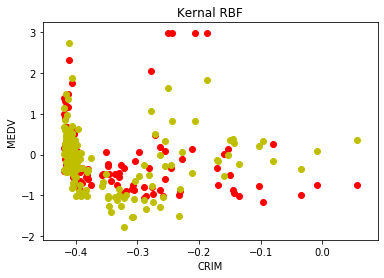

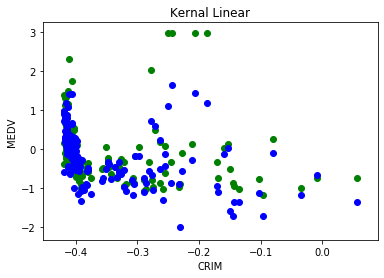

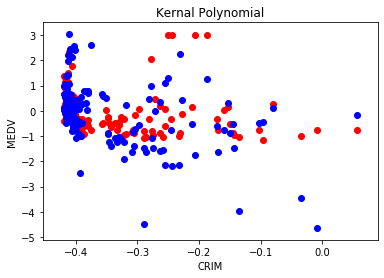

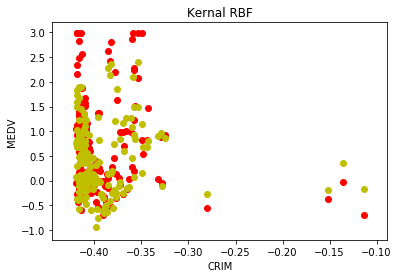

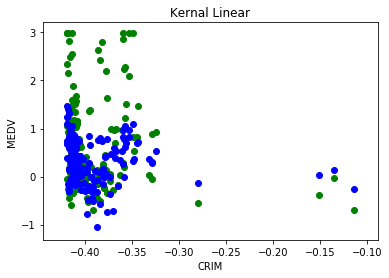

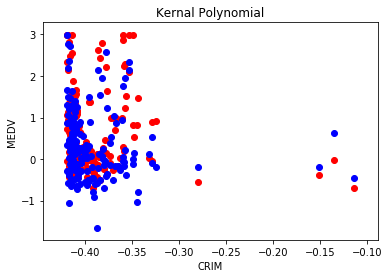

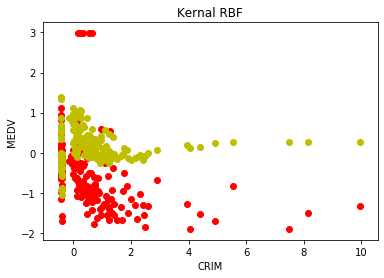

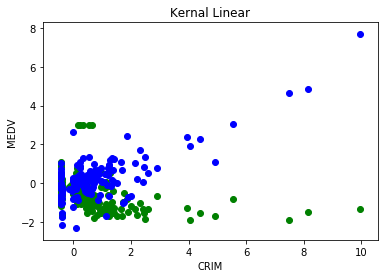

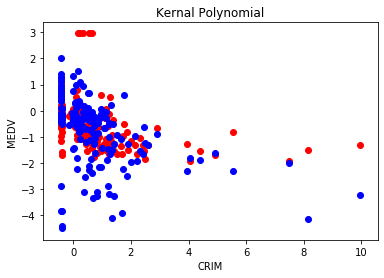

In [9]:
scores_rbf = []
scores_lin = []
scores_poly = []
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
cv = KFold(n_splits=3, random_state=0, shuffle=False)
for train_index, test_index in cv.split(data):
#     print("Train Index: ", train_index)
#     print("Test Index: ", test_index,  "\n")
    
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in range(len(train_index)):
        X_train.append(data[train_index[i]][:-1])
        Y_train.append(data[train_index[i]][-1])
    for i in range(len(test_index)):
        X_test.append(data[test_index[i]][:-1])
        Y_test.append(data[test_index[i]][-1])
        
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    Y_train = np.array(Y_train)
    Y_test = np.array(Y_test)
        
    svr_rbf.fit(X_train, Y_train)
    rbf_predict = svr_rbf.predict(X_test)
    scores_rbf.append(svr_rbf.score(X_test, Y_test))
    
    plt.title('Kernal RBF')
    plt.xlabel('CRIM')
    plt.ylabel('MEDV')
    plt.scatter(X_test[:,0], Y_test, color = 'r')
    plt.scatter(X_test[:,0], rbf_predict, color = 'y')
    plt.show()
    
    svr_lin.fit(X_train, Y_train)
    lin_predict = svr_lin.predict(X_test)
    scores_lin.append(svr_lin.score(X_test, Y_test))
    
    plt.title('Kernal Linear')
    plt.xlabel('CRIM')
    plt.ylabel('MEDV')
    plt.scatter(X_test[:,0], Y_test, color = 'g', label="Y_test".format('r'))
    plt.scatter(X_test[:,0], lin_predict, color = 'b',label="Y_predicted".format('y'))
    plt.show()
    
    svr_poly.fit(X_train, Y_train)
    poly_predict = svr_poly.predict(X_test)
    scores_poly.append(svr_poly.score(X_test, Y_test))
    
    plt.title('Kernal Polynomial')
    plt.xlabel('CRIM')
    plt.ylabel('MEDV')
    plt.scatter(X_test[:,0], Y_test, color = 'r', label="Y_test".format('r'))
    plt.scatter(X_test[:,0], poly_predict, color = 'b',label="Y_predicted".format('y'))
    plt.show()


In [10]:
print(np.mean(scores_rbf))
print(np.mean(scores_lin))
print(np.mean(scores_poly))

0.2030258630453181
-0.5167603787734069
-0.39797235122820124
